In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

## How to use the t-SNE algorithm on APOGEE globular cluster data. 
##### Steffani Grondin (September 23, 2022)

#### STEP 0: Import the necessary packages/algorithms.

In [2]:
# General analysis/plotting packages:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
from collections import Counter

# Specific t-SNE/visualization packages:
from sklearn.manifold import TSNE
from shapely.geometry import Point, Polygon

Try loading in the full APOGEE dataset instead:

In [3]:
apogee = pd.read_csv('../tsne_umap_tutorials/data/APOGEEDR17_GAIAEDR3_filter.csv', delimiter=',')

In [4]:
apogee.columns

Index(['# APOGEE_ID_', 'GAIAEDR3_SOURCE_ID', 'RA', 'DEC', 'VHELIO_AVG', 'VERR',
       'VSCATTER', 'TEFF', 'TEFF_ERR', 'LOGG', 'LOGG_ERR', 'SNR', 'ASPCAPFLAG',
       'STARFLAG', 'jr', 'jr_err', 'jz', 'jz_err', 'Lz', 'Lz_err',
       'GAIAEDR3_PARALLAX', 'GAIAEDR3_PARALLAX_ERROR', 'GAIAEDR3_PMRA',
       'GAIAEDR3_PMRA_ERROR', 'GAIAEDR3_PMDEC', 'GAIAEDR3_PMDEC_ERROR',
       'GAIAEDR3_PHOT_G_MEAN_MAG', 'GAIAEDR3_PHOT_RP_MEAN_MAG',
       'GAIAEDR3_DR2_RADIAL_VELOCITY', 'GAIAEDR3_DR2_RADIAL_VELOCITY_ERROR',
       'GAIAEDR3_R_MED_GEO', 'GAIAEDR3_R_LO_GEO', 'GAIAEDR3_R_HI_GEO',
       'GAIAEDR3_R_MED_PHOTOGEO', 'GAIAEDR3_R_LO_PHOTOGEO',
       'GAIAEDR3_R_HI_PHOTOGEO', 'J', 'J_ERR', 'H', 'H_ERR', 'K', 'K_ERR',
       'FE_H', 'C_FE', 'CI_FE', 'N_FE', 'O_FE', 'MG_FE', 'AL_FE', 'SI_FE',
       'P_FE', 'S_FE', 'K_FE', 'CA_FE', 'TI_FE', 'TIII_FE', 'V_FE', 'CR_FE',
       'MN_FE', 'CO_FE', 'NI_FE', 'FE_H_ERR', 'C_FE_ERR', 'CI_FE_ERR',
       'N_FE_ERR', 'O_FE_ERR', 'MG_FE_ERR', 'AL_FE_ERR', 'S

In [5]:
# Spatial:
ra = apogee["RA"]   #APOGEE
dec = apogee["DEC"]   #APOGEE

# Identification:
apogee_ID = apogee["# APOGEE_ID_"]   #APOGEE
gaia_ID = apogee["GAIAEDR3_SOURCE_ID"]  # Gaia

# Kinematic:
parallax = apogee["GAIAEDR3_PARALLAX"]  # Gaia
pmra = apogee["GAIAEDR3_PMRA"]  # Gaia
pmra_err = apogee["GAIAEDR3_PMRA_ERROR"]  # Gaia
pmdec = apogee["GAIAEDR3_PMDEC"]  # Gaia
pmdec_err = apogee["GAIAEDR3_PMDEC_ERROR"]  # Gaia
RV = apogee["GAIAEDR3_DR2_RADIAL_VELOCITY"]   #APOGEE
RV_err = apogee["GAIAEDR3_DR2_RADIAL_VELOCITY_ERROR"]   #APOGEE
# dist = apogee["dist"]   #APOGEE
# dist_err = apogee["dist_err"]   #APOGEE
jr = apogee["jr"]   #APOGEE
jr_err = apogee["jr_err"]   #APOGEE
jz = apogee["jz"]   #APOGEE
jz_err = apogee["jz_err"]   #APOGEE
jphi = apogee["Lz"]   #APOGEE
jphi_err = apogee["Lz_err"]    #APOGEE

# Spectral (useful for filtering):
TEFF_ERR = apogee["TEFF_ERR"]   #APOGEE
TEFF = apogee["TEFF"]   #APOGEE
LOGG_ERR = apogee["LOGG_ERR"]   #APOGEE
LOGG = apogee["LOGG"]   #APOGEE
SNR = apogee["SNR"]   #APOGEE

# Chemical abundances from astroNN:
FE_H = apogee['FE_H'] 
C_FE = apogee['C_FE']
CI_FE = apogee['CI_FE']
N_FE = apogee['N_FE']
O_FE = apogee['O_FE']
MG_FE = apogee['MG_FE']
AL_FE = apogee['AL_FE']
SI_FE = apogee['SI_FE']
P_FE = apogee['P_FE']
S_FE = apogee['S_FE']
K_FE = apogee['K_FE']
CA_FE = apogee['CA_FE']
TI_FE = apogee['TI_FE']
TIII_FE = apogee['TIII_FE']
V_FE = apogee['V_FE']
CR_FE = apogee['CR_FE']
MN_FE = apogee['MN_FE']
CO_FE = apogee['CO_FE']
NI_FE = apogee['NI_FE']

# Chemical abundance errors from astroNN:
FE_H_err = apogee["FE_H_ERR"] 
C_FE_err = apogee['C_FE_ERR']
CI_FE_err = apogee['CI_FE_ERR']
N_FE_err = apogee['N_FE_ERR']
O_FE_err = apogee['O_FE_ERR']
MG_FE_err = apogee['MG_FE_ERR']
AL_FE_err = apogee['AL_FE_ERR']
SI_FE_err = apogee['SI_FE_ERR']
P_FE_err = apogee['P_FE_ERR']
S_FE_err = apogee['S_FE_ERR']
K_FE_err = apogee['K_FE_ERR']
CA_FE_err = apogee['CA_FE_ERR']
TI_FE_err = apogee['TI_FE_ERR']
TIII_FE_err = apogee['TIII_FE_ERR']
V_FE_err = apogee['V_FE_ERR']
CR_FE_err = apogee['CR_FE_ERR']
MN_FE_err = apogee['MN_FE_ERR']
CO_FE_err = apogee['CO_FE_ERR']
NI_FE_err = apogee['NI_FE_ERR']

# Number of stars in the initial sample of APOGEE DR16: 
print("There are {} stars in our initial sample".format(len(ra)))

# create dist and dist_err columns of zeros for now
dist = pd.Series(0, index=np.arange(len(RV)))
dist_err = pd.Series(0, index=np.arange(len(RV)))

cols = [ra, dec, apogee_ID, gaia_ID, parallax, pmra, pmra_err, pmdec, pmdec_err, RV, RV_err, dist, dist_err,
        jr, jr_err, jphi, jphi_err, jz, jz_err, TEFF, TEFF_ERR, LOGG, LOGG_ERR, SNR, FE_H, FE_H_err, C_FE, 
        C_FE_err, CI_FE, CI_FE_err, N_FE, N_FE_err, O_FE, O_FE_err, MG_FE, MG_FE_err, AL_FE, AL_FE_err, SI_FE,
        SI_FE_err, P_FE, P_FE_err, S_FE, S_FE_err, K_FE, K_FE_err, CA_FE, CA_FE_err, TI_FE, TI_FE_err, TIII_FE,
        TIII_FE_err, V_FE, V_FE_err, CR_FE, CR_FE_err, MN_FE, MN_FE_err, CO_FE, CO_FE_err, NI_FE, NI_FE_err]

There are 147750 stars in our initial sample


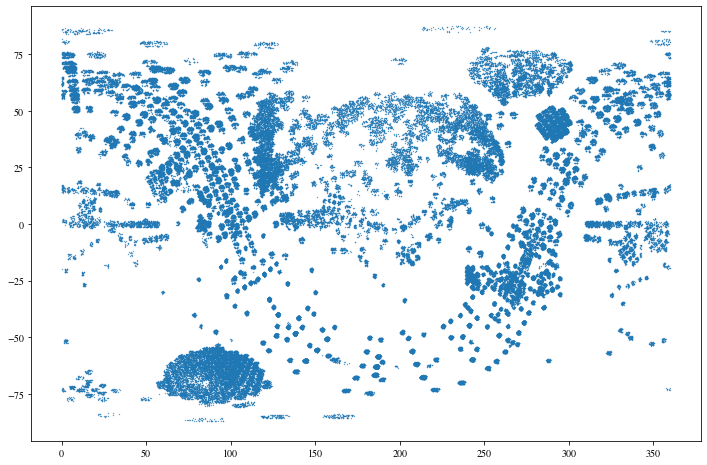

In [6]:
plt.figure(figsize = (12, 8))
plt.scatter(ra, dec, s=0.1)

#### STEP 2: Filter the data. 

First, we remove all stars without proper motions and chemical abundances for all 19 elements. Next, for stars with multiple spectra, we select the one with the highest SNR to represent the source. Finally, we remove all stars with low signal-to-noise (SNR) ratios. 

In [7]:
### Filter 1: Remove stars that do not have proper motion values. ###
pm_filter_nan = np.isnan(pmra)
pm_filter = np.where(pm_filter_nan==False)
data_pmfilter = []
for i in cols:
    x = np.array(i)[pm_filter]
    data_pmfilter.append(x)
print("There are {} stars in our sample after the proper motion filtering.".format(len(data_pmfilter[0])))

### Filter 2: Remove stars that do not have data for all 19 abundances or radial velocities. ###

# 24, 26, .... 60 are abundances, 9 is RV
abundance_filter = np.where((data_pmfilter[24] > -9999) & (data_pmfilter[26] > -9999) & (data_pmfilter[28]  > -9999)
                            & (data_pmfilter[30]  > -9999) & (data_pmfilter[32]  > -9999) & (data_pmfilter[34]  > -9999)
                            & (data_pmfilter[36]  > -9999) & (data_pmfilter[38]  > -9999) & (data_pmfilter[40]  > -9999)
                            & (data_pmfilter[42]  > -9999) & (data_pmfilter[44]  > -9999) & (data_pmfilter[46]  > -9999)
                            & (data_pmfilter[48]  > -9999) & (data_pmfilter[50]  > -9999) & (data_pmfilter[52]  > -9999)
                            & (data_pmfilter[54]  > -9999) & (data_pmfilter[56]  > -9999) & (data_pmfilter[58]  > -9999)
                            & (data_pmfilter[60]  > -9999) & (data_pmfilter[9] > -9999))

data_abundancefilter = []
for i in data_pmfilter:
    y = np.array(i)[abundance_filter]
    data_abundancefilter.append(y)
print("There are {} stars in our sample after the abundance filtering.".format(len(data_abundancefilter[0])))

### Filter 3: Remove all duplicate spectra (i.e. select spectra with highest SNR for multiple measurements). ###
d =  Counter(data_abundancefilter[0])
duplicates = [k for k, v in d.items() if v > 1]
a_list = np.array(range(0, len(duplicates)))
max_SNR_array = []

for i in a_list:
    indices = np.where(data_abundancefilter[0] == duplicates[i])
    snr_val = data_abundancefilter[23][indices]
    maximum = max(snr_val)
    index_maximum = np.where((data_abundancefilter[0] == duplicates[i]) & (data_abundancefilter[23] == maximum))
    index_maximum = int(index_maximum[0])
    max_SNR_array.append(index_maximum)

idx_sort = np.argsort(data_abundancefilter[0])
sorted_ra_array = data_abundancefilter[0][idx_sort]
vals, idx_start, count = np.unique(sorted_ra_array, return_counts=True, return_index=True)
res = np.split(idx_sort, idx_start[1:])
vals = vals[count == 1]
listtest =  np.array(range(0, len(vals)))

unique_array = []
for i in listtest:
    unique_val = np.where(vals[i] == data_abundancefilter[0])
    unique_val = int(unique_val[0])
    unique_array.append(unique_val)
    
#print("There are {} stars that do not have duplicate spectra.".format(len(unique_array)))
#print("There are {} stars that have multiple spectra, in which we select highest SNR.".format(len(max_SNR_array)))

duplicates_filter = np.concatenate((unique_array, max_SNR_array)).astype(int)
sortedarray = np.sort(duplicates_filter)

data_duplicatesfilter = []
for i in data_abundancefilter:
    z = np.array(i)[duplicates_filter]
    data_duplicatesfilter.append(z)

print("There are {} stars in our sample after removing sources with duplicate spectra.".format(len(data_duplicatesfilter[0])))

### Filter 4: Remove all stars with low SNR. ###
SNR_filter = np.where(data_duplicatesfilter[23] > 50)
data_snrfilter = []
for i in data_duplicatesfilter:
    a = np.array(i)[SNR_filter]
    data_snrfilter.append(a)

print("There are {} stars in our sample after removing sources with low SNR.".format(len(data_snrfilter[0])))

There are 147329 stars in our sample after the proper motion filtering.
There are 76219 stars in our sample after the abundance filtering.
There are 76219 stars in our sample after removing sources with duplicate spectra.
There are 76219 stars in our sample after removing sources with low SNR.


# **

#### ***CHECK-IN: Now that your data has been reduced, do some exploratory data analysis to see what the sample looks like!*

What parameters are in this file? What parameters might be useful to connect extra-tidal stars with a suspected birth cluster?

In [8]:
len(data_snrfilter)

62

In [9]:
data_snrfilter[0].shape

(76219,)

In [10]:
plt.scatter(data_snrfilter[apogee.columns.get_loc("ra")], data_snrfilter[apogee.columns.get_loc("NFE")])
plt.xlabel('RA'), plt.ylabel('N/FE')

KeyError: 'ra'

In [ ]:
abundance_params = [column for column in apogee.columns if 'FE' in column and not '_ERR' in column]
plt.figure(figsize = (12, 8))
for param in abundance_params:
    plt.hist(data_snrfilter[apogee.columns.get_loc(param)], label = param)  # plot
    print(param + f" mean abundance: {np.mean(data_snrfilter[apogee.columns.get_loc(param)])}")
plt.legend()

In [ ]:
plt.hist(data_snrfilter[apogee.columns.get_loc("N_FE")])

In [ ]:
plt.figure(figsize = (12, 8))
for param in abundance_params:
    plt.scatter(data_snrfilter[M3.columns.get_loc("dec")], data_snrfilter[M3.columns.get_loc(param)], label = param)
plt.legend()

In [ ]:
plt.scatter(data_snrfilter[M3.columns.get_loc("dec")], data_snrfilter[M3.columns.get_loc("OFE")])
plt.xlabel('Dec'), plt.ylabel('N/FE')

In [ ]:
plt.hist(data_snrfilter[M3.columns.get_loc("RV")])
np.mean(data_snrfilter[M3.columns.get_loc("RV")])

In [ ]:
plt.figure(figsize = (12, 8))
for param in abundance_params:
    plt.scatter(data_snrfilter[M3.columns.get_loc("RV")], data_snrfilter[M3.columns.get_loc(param)], label = param)
plt.xlabel('RV'), plt.ylabel('abundance')
plt.legend()

In [ ]:
abundance_params

In [ ]:
list(M3.columns)

#### STEP 3: Define parameters for your GC of interest. 

These parameters are taken from the Baumgardt & Hilker (2018) catalogue: https://people.smp.uq.edu.au/HolgerBaumgardt/globular/.

In [11]:
ra_M3 = 205.548  # [deg]
dec_M3 = 28.3772  # [deg]
dist_M3 = 10180  # [pc]
rt_M3 = 159.0339  # [pc] -- tidal radius @ apogalacticon
rhm_M3 = 6.34  # [pc]
rhm_M3_deg = math.degrees(math.atan(rhm_M3 / dist_M3))  # deg
pmra_M3 = -0.152  # [mas/yr]
pmdec_M3 = -2.670  # [mas/yr]

#### STEP 4: Define a control group of cluster members.

We must define a control group of likely cluster members of M3 so we can see where these stars end up in the t-SNE projection. 

In [12]:
# Select all the stars within some radius of the cluster:
def in_circle(center_x, center_y, radius, x, y):
    square_dist = (center_x - x) ** 2 + (center_y - y) ** 2
    return square_dist <= (radius) ** 2

ra_filtered = data_snrfilter[0]
dec_filtered = data_snrfilter[1]

# Select stars within 8 * r,hm (useful for large enough sample of probable cluster members):
in_halfmass = in_circle(ra_M3, dec_M3, 8*rhm_M3_deg, ra_filtered, dec_filtered)
indices_control = np.where(in_halfmass==True)

controlgroup = []
for i in data_snrfilter:
    b = np.array(i)[indices_control]
    controlgroup.append(b)

# Example control group parameters: 
ra_control = controlgroup[0]
dec_control = controlgroup[1]

print("There are {} stars in our M3 control group.".format(len(ra_control)))

There are 11 stars in our M3 control group.


Plot stars in plane of the sky with control stars marked

In [13]:
plt.figure(figsize = (12, 8))
plt.scatter(M3["ra"], M3["dec"], s=1)
plt.scatter(ra_control, dec_control, s=1)

NameError: name 'M3' is not defined

<Figure size 864x576 with 0 Axes>

In [14]:
abundance_params = [column for column in M3.columns if 'FE' in column and not '_err' in column]
plt.figure(figsize = (12, 8))
for param in abundance_params:
    plt.hist(controlgroup[M3.columns.get_loc(param)], label = param)  # plot
    print(param + f" mean abundance: {np.mean(controlgroup[M3.columns.get_loc(param)])}")
plt.legend()

NameError: name 'M3' is not defined

In [ ]:
plt.figure(figsize = (12, 8))
for param in abundance_params:
    plt.scatter(controlgroup[M3.columns.get_loc("RV")], controlgroup[M3.columns.get_loc(param)], label = param)
plt.xlabel('RV'), plt.ylabel('abundance')
plt.legend()

#### ***CHECK-IN: Add this control group to your above exploratory plots.* 

What do you notice about these stars? What changes if you adjust the control group radius (i.e. what if you go larger or smaller than 8*r,hm)?


# **

#### STEP 5: Run t-SNE on the control group and full filtered sample of APOGEE DR17 stars.

First, we standardize the data to ensure that no elements dominate or skew the t-SNE run. We want to include 19 chemical abundances and radial velocities in our run.  

In [17]:
FE_H_filtered, C_FE_filtered, CI_FE_filtered = data_snrfilter[24], data_snrfilter[26], data_snrfilter[28]
N_FE_filtered, O_FE_filtered, MG_FE_filtered = data_snrfilter[30], data_snrfilter[32], data_snrfilter[34]
AL_FE_filtered, SI_FE_filtered, P_FE_filtered = data_snrfilter[36], data_snrfilter[38], data_snrfilter[40]
S_FE_filtered, K_FE_filtered, CA_FE_filtered = data_snrfilter[42], data_snrfilter[44], data_snrfilter[46]
TI_FE_filtered, TIII_FE_filtered, V_FE_filtered = data_snrfilter[48], data_snrfilter[50], data_snrfilter[52]
CR_FE_filtered, MN_FE_filtered, CO_FE_filtered, NI_FE_filtered = data_snrfilter[54], data_snrfilter[56], data_snrfilter[58], data_snrfilter[60]
RV_filtered  = data_snrfilter[9]

pretsne_array = np.array([FE_H_filtered, C_FE_filtered, CI_FE_filtered, N_FE_filtered, O_FE_filtered, MG_FE_filtered,
                      AL_FE_filtered, SI_FE_filtered, P_FE_filtered, S_FE_filtered, K_FE_filtered, CA_FE_filtered, 
                      TI_FE_filtered, TIII_FE_filtered, V_FE_filtered, CR_FE_filtered, MN_FE_filtered, CO_FE_filtered,
                       NI_FE_filtered, RV_filtered])

standardized_array = []
for i in pretsne_array:
    mean, sigma = np.mean(i), np.std(i)
    norm = (i - mean) / sigma
    standardized_array.append(norm)

Next, we apply the t-SNE algorithm via scikit-learn to reduce the dimensionality of the data from 20-D to 2-D.

In [18]:
# Transpose the standardized + filtered array:
standardized_array_transpose = np.transpose(standardized_array)

# Run t-SNE on the transposed array:
tsne_init = TSNE(n_components=2, perplexity=30, early_exaggeration=12, learning_rate=200, init='random')
tsne_2d = tsne_init.fit_transform(standardized_array_transpose)

# Get t-SNE outputs for complete filtered dataset:
t_SNE_dimX = tsne_2d[:, 0]
t_SNE_dimY = tsne_2d[:, 1]

# Get t-SNE outputs for control group:
# tsne_dimX_control = t_SNE_dimX[indices_control]
# tsne_dimY_control = t_SNE_dimY[indices_control]

Finally, we plot the 2-D t-SNE projection. 

In [19]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(t_SNE_dimX, t_SNE_dimY, s=0.1, c=C_FE_filtered, label='APOGEE DR17 stars')
# ax.scatter(tsne_dimX_control , tsne_dimY_control, s=45, edgecolor='k', c='hotpink', label='M3 Control Group')
ax.set_xlabel("t-SNE X-Dimension", fontsize=16)
ax.set_ylabel("t-SNE Y-Dimension", fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=16)
ax.legend(fontsize=16, loc=1)
plt.show()
# plt.savefig('')

KeyboardInterrupt: 

<Figure size 864x576 with 0 Axes>

## UMAP stuff:

In [20]:
import umap.umap_ as umap

# Try using SKLEARN's StandardScaler to standardize the data
from sklearn.preprocessing import StandardScaler

In [21]:
reducer = umap.UMAP(n_neighbors=15)
embedding = reducer.fit_transform(standardized_array_transpose)

# Get t-SNE outputs for complete filtered dataset:
umap_dimX = embedding[:, 0]
umap_dimY = embedding[:, 1]

# Get t-SNE outputs for control group:
# umap_dimX_control = umap_dimX[indices_control]
# umap_dimY_control = umap_dimY[indices_control]

Colorbar:

<ipython-input-48-a1a218b26bb9>:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fmt" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('umap_full_apogee_colorbar.png', fmt='png')


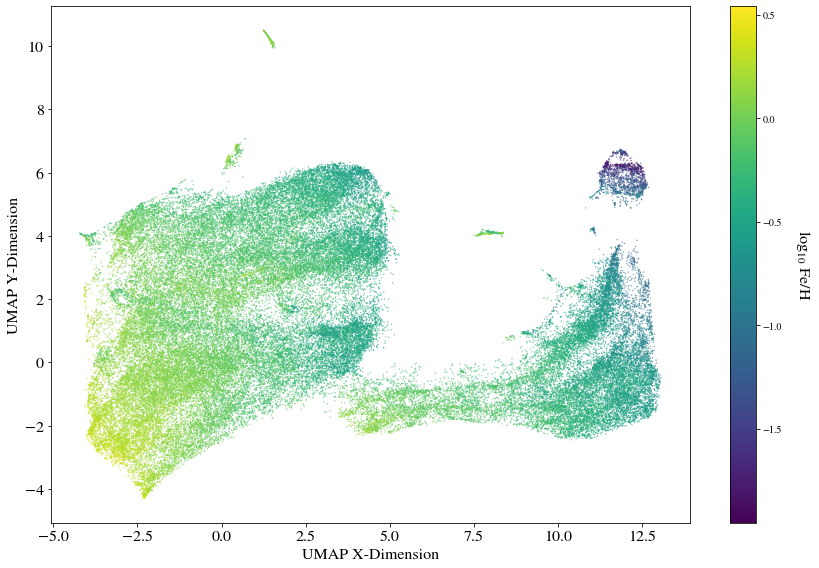

In [48]:
plt.figure(figsize = (12, 8))
plt.scatter(umap_dimX, umap_dimY, s=0.1, c=FE_H_filtered)
plt.xlabel("UMAP X-Dimension", fontsize=16)
plt.ylabel("UMAP Y-Dimension", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tick_params(axis='both', which='minor', labelsize=16)
cb = plt.colorbar()
cb.set_label(r'$\log_{10}$ Fe/H', rotation=270, fontsize = 16, labelpad=30)
plt.tight_layout()
# cb = fig.colorbar()
# plt.legend(fontsize=16)
plt.savefig('umap_full_apogee_colorbar.png', fmt='png')
plt.show()

No handles with labels found to put in legend.
<ipython-input-29-01b089bfd4c7>:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fmt" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('umap_full_apogee.png', fmt='png')


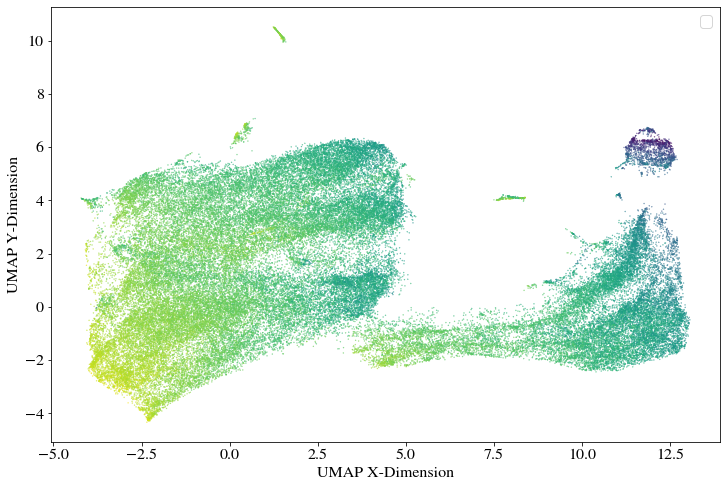

In [29]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(umap_dimX, umap_dimY, s=0.1, c=FE_H_filtered)#, label='APOGEE DR17 stars')
# ax.scatter(umap_dimX_control , umap_dimY_control, s=45, edgecolor='k', c='hotpink', label='M3 Control Group')
ax.set_xlabel("UMAP X-Dimension", fontsize=16)
ax.set_ylabel("UMAP Y-Dimension", fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=16)
# cb = fig.colorbar()
ax.legend(fontsize=16)
plt.savefig('umap_full_apogee.png', fmt='png')
plt.show()

## NN:

Now we use the NN to try and reproduce the UMAP data (with the original $19$ chemical abundances as well as radial velocities ($20$ total parameters) as the xs and their corresponding UMAP positions as the ys)

FE_H, C_FE, CI_FE, N_FE, O_FE, MG_FE,
                      AL_FE, SI_FE, P_FE, S_FE, K_FE, CA_FE, 
                      TI_FE, TIII_FE, V_FE, CR_FE, MN_FE, CO_FE,
                       NI_FE, RV in that order

First split the data into training, testing and validation:

In [14]:
# use 60/20/20 split for training, testing, validation

# train_pct = 0.6
test_pct = 0.3
# valid_pct = 0.2

# seed to use
seed = 1234

from sklearn.model_selection import train_test_split
# split into training and test
train_xs, test_xs = train_test_split(standardized_array_transpose, test_size = int(test_pct * len(standardized_array_transpose)), random_state=seed)
# train_xs, test_xs, train_ys, test_ys = train_test_split(xs, ys, test_size = int(test_pct * len(xs)), random_state=seed)

Now run UMAP on each of the training and testing sets separately so we have the $y$ values (UMAP outputs):

In [15]:
reducer = umap.UMAP(n_neighbors=15)
reducer.fit(train_xs)

# training

train_embedding = reducer.transform(train_xs)
train_umap_dimX = train_embedding[:, 0]
train_umap_dimY = train_embedding[:, 1]

# testing

test_embedding = reducer.transform(test_xs)
test_umap_dimX = test_embedding[:, 0]
test_umap_dimY = test_embedding[:, 1]

Plot the UMAP results:

Text(0.5, 1.0, 'Testing')

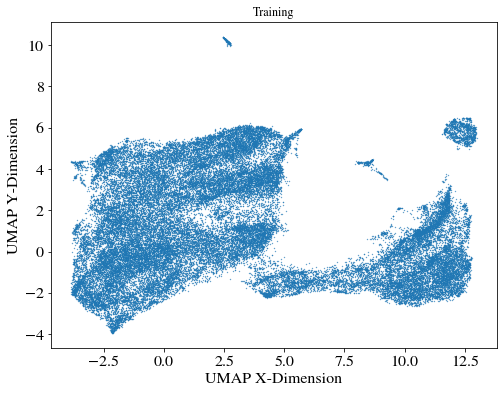

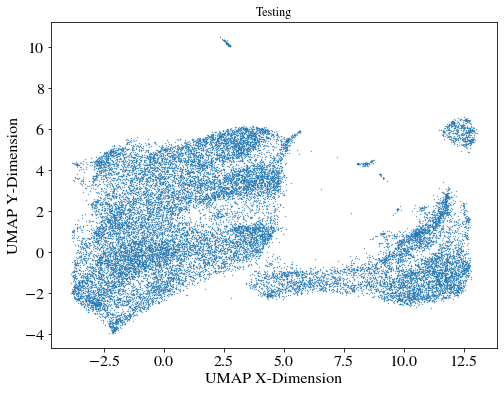

In [16]:
# training
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(train_umap_dimX, train_umap_dimY, s=0.1, label='APOGEE DR17 stars')
ax.set_xlabel("UMAP X-Dimension", fontsize=16)
ax.set_ylabel("UMAP Y-Dimension", fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=16)
plt.title('Training')
# testing
fig2, ax2 = plt.subplots(figsize=(8,6))
ax2.scatter(test_umap_dimX, test_umap_dimY, s=0.1, label='APOGEE DR17 stars')
ax2.set_xlabel("UMAP X-Dimension", fontsize=16)
ax2.set_ylabel("UMAP Y-Dimension", fontsize=16)
ax2.tick_params(axis='both', which='major', labelsize=16)
ax2.tick_params(axis='both', which='minor', labelsize=16)
plt.title('Testing')

Now create the training and testing ys:

In [17]:
# ys are the umap positions
train_ys = np.array(list(zip(train_umap_dimX, train_umap_dimY)))
test_ys = np.array(list(zip(test_umap_dimX, test_umap_dimY)))

## Forward:

Now create the model using keras (takes in $20$-D vector and spits out a $2$-D vector), just try using the same one i did before:

In [18]:
umap_nn_model = tf.keras.Sequential([
    # tf.keras.layers.InputLayer(batch_input_shape=(batch_size, None, 2))
    tf.keras.layers.Dense(units=100, input_shape=(20, ),  activation='gelu'),
    tf.keras.layers.Dense(units=100, activation='gelu'),
    tf.keras.layers.Dense(units=100, activation='gelu'),
    tf.keras.layers.Dense(units=50, activation='gelu'),
    tf.keras.layers.Dense(units=25, activation='gelu'),
    tf.keras.layers.Dense(units=10, activation='gelu'),
    tf.keras.layers.Dense(units=5, activation='gelu'),
    tf.keras.layers.Dense(units=2)#, activation='gelu')
])

Train the model:

In [19]:
umap_nn_model.compile(optimizer='adam', 
              loss=tf.losses.MeanSquaredError(),
              metrics=['mse'])

umap_nn_model.fit(train_xs, train_ys, epochs=100)

Epoch 1/100
1668/1668 [==============================] - 6s 3ms/step - loss: 1.2191 - mse: 1.2191
Epoch 2/100
1668/1668 [==============================] - 5s 3ms/step - loss: 0.2612 - mse: 0.2612
Epoch 3/100
1668/1668 [==============================] - 5s 3ms/step - loss: 0.2093 - mse: 0.2093
Epoch 4/100
1668/1668 [==============================] - 5s 3ms/step - loss: 0.1781 - mse: 0.1781
Epoch 5/100
1668/1668 [==============================] - 5s 3ms/step - loss: 0.1612 - mse: 0.1612
Epoch 6/100
1668/1668 [==============================] - 5s 3ms/step - loss: 0.1486 - mse: 0.1486
Epoch 7/100
1668/1668 [==============================] - 5s 3ms/step - loss: 0.1360 - mse: 0.1360
Epoch 8/100
1668/1668 [==============================] - 5s 3ms/step - loss: 0.1292 - mse: 0.1292
Epoch 9/100
1668/1668 [==============================] - 6s 3ms/step - loss: 0.1253 - mse: 0.1253
Epoch 10/100
1668/1668 [==============================] - 6s 3ms/step - loss: 0.1170 - mse: 0.1170
Epoch 11/100
1668/1

Test the accuracy:

In [20]:
test_loss, test_mse = umap_nn_model.evaluate(test_xs, test_ys, verbose=2)
print('\nTest MSE:', test_mse)

715/715 - 1s - loss: 0.1499 - mse: 0.1499 - 1s/epoch - 2ms/step

Test MSE: 0.1498533934354782


Now see the predictions:

In [21]:
train_preds = umap_nn_model.predict(train_xs)
test_preds = umap_nn_model.predict(test_xs)

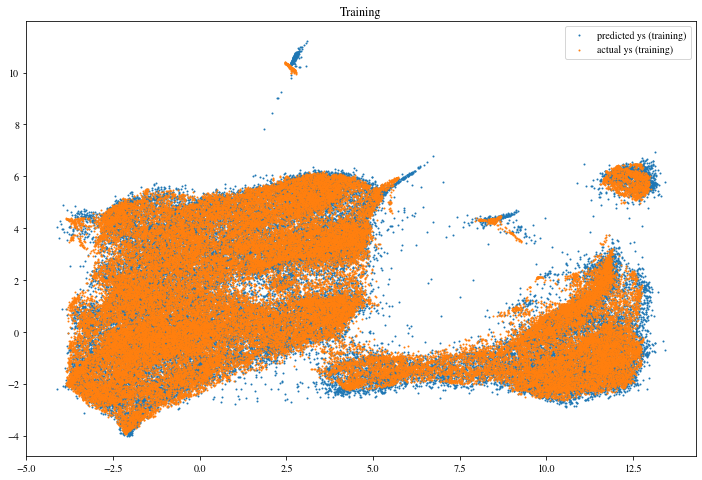

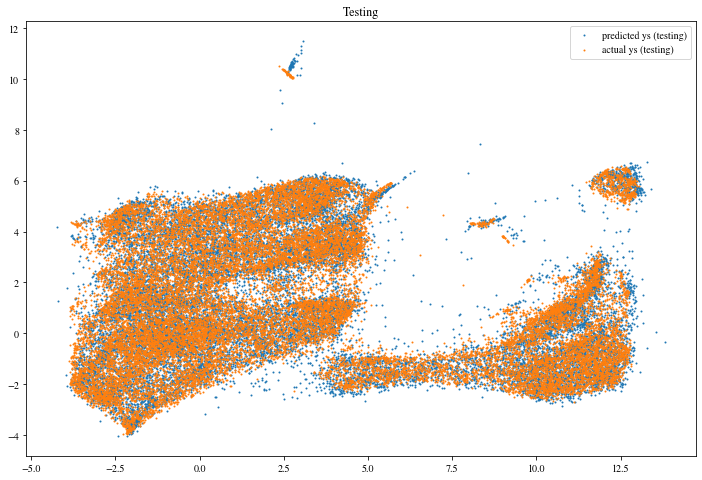

In [22]:
# TRAINING RESULTS
fig = plt.figure(figsize = (12, 8))
plt.scatter(train_preds[:, 0], train_preds[:, 1], s=1, label = 'predicted ys (training)')
plt.scatter(train_ys[:, 0], train_ys[:, 1], s=1, label = 'actual ys (training)')
plt.legend()
plt.title('Training')

# TEST RESULTS (important)
fig2 = plt.figure(figsize = (12, 8))
plt.scatter(test_preds[:, 0], test_preds[:, 1], s=1, label = 'predicted ys (testing)')
plt.scatter(test_ys[:, 0], test_ys[:, 1], s=1, label = 'actual ys (testing)')
plt.legend()
plt.title('Testing')
plt.savefig('full_umap_nn_test_results.png')

## Reverse:

Now try to reverse the process to return to the original data and see the reconstruction loss (MSE) 

Create a model for the reverse process (train_ys from train_xs):

In [23]:
# now takes in 2d and outputs 20d

# not justified, just trying things
umap_nn_model_reverse = tf.keras.Sequential([
    # tf.keras.layers.InputLayer(batch_input_shape=(batch_size, None, 2))
    tf.keras.layers.Dense(units=10, input_shape=(2, ),  activation='gelu'),
    tf.keras.layers.Dense(units=25, activation='gelu'),
    tf.keras.layers.Dense(units=50, activation='gelu'),
    tf.keras.layers.Dense(units=100, activation='gelu'),
    tf.keras.layers.Dense(units=100, activation='gelu'),
    tf.keras.layers.Dense(units=100, activation='gelu'),
    tf.keras.layers.Dense(units=50, activation='gelu'),
    tf.keras.layers.Dense(units=20)#, activation='gelu')
])

Train the reverse model:

In [24]:
umap_nn_model_reverse.compile(optimizer='adam', 
              loss=tf.losses.MeanSquaredError(),
              metrics=['mse'])

umap_nn_model_reverse.fit(train_ys, train_xs, epochs=100)

Epoch 1/100
1668/1668 [==============================] - 6s 3ms/step - loss: 0.2584 - mse: 0.2584
Epoch 2/100
1668/1668 [==============================] - 6s 3ms/step - loss: 0.2012 - mse: 0.2012
Epoch 3/100
1668/1668 [==============================] - 5s 3ms/step - loss: 0.1904 - mse: 0.1904
Epoch 4/100
1668/1668 [==============================] - 5s 3ms/step - loss: 0.1847 - mse: 0.1847
Epoch 5/100
1668/1668 [==============================] - 5s 3ms/step - loss: 0.1817 - mse: 0.1817
Epoch 6/100
1668/1668 [==============================] - 5s 3ms/step - loss: 0.1804 - mse: 0.1804
Epoch 7/100
1668/1668 [==============================] - 6s 4ms/step - loss: 0.1777 - mse: 0.1777
Epoch 8/100
1668/1668 [==============================] - 7s 4ms/step - loss: 0.1779 - mse: 0.1779
Epoch 9/100
1668/1668 [==============================] - 5s 3ms/step - loss: 0.1756 - mse: 0.1756
Epoch 10/100
1668/1668 [==============================] - 5s 3ms/step - loss: 0.1745 - mse: 0.1745
Epoch 11/100
1668/1

Print test MSE of the reverse model (test the accuracy):

In [25]:
test_loss_reverse, test_mse_reverse = umap_nn_model_reverse.evaluate(test_ys, test_xs, verbose=2)
print('\nTest MSE:', test_mse_reverse)

715/715 - 1s - loss: 0.1642 - mse: 0.1642 - 1s/epoch - 2ms/step

Test MSE: 0.16420528292655945


Now use the backward model to predict the original test_xs from the predicted values that the forward model used:

In [26]:
# original model predicts test_preds using test_xs, this reverse model tries to recover the xs predicting from test_preds
test_x_preds = umap_nn_model_reverse.predict(test_preds)

### Result:

Then we compare the recovered predicted test_x values to the original test_x values and see the MSE of our two NNs:

In [27]:
test_xs, test_x_preds

(array([[ 0.78495016, -0.10992719,  0.01639594, ...,  0.12331159,
          0.0608309 ,  0.70760023],
        [ 1.60858362,  0.2561288 , -0.23995051, ...,  0.47658726,
          0.81436856,  0.22081716],
        [ 0.48069144, -0.41362157, -0.47346281, ...,  0.04563259,
         -1.04546679,  0.14085107],
        ...,
        [-0.53765912, -0.73485072, -0.44918234, ..., -0.05995933,
         -0.31260893,  0.61330861],
        [ 0.05018082, -1.78967364, -1.72523933, ...,  0.13793358,
         -0.92146584,  1.21864977],
        [-0.39380562,  0.82801975,  1.39785523, ...,  0.45961838,
          1.5359876 , -0.60777951]]),
 array([[ 0.7208967 , -0.27025247, -0.6221333 , ...,  0.07773089,
         -0.7893958 ,  0.3925053 ],
        [ 1.6353792 ,  0.5324516 , -0.18827465, ...,  0.41560304,
          0.9784142 , -0.11061323],
        [ 0.5615281 , -0.286962  , -0.54744804, ...,  0.00484478,
         -0.6874719 ,  0.28685102],
        ...,
        [-0.36390275, -0.10124917, -0.08385602, ..., -

In [28]:
# from sklearn.metrics import mean_squared_error
# mean_squared_error(test_xs, test_x_preds)

# reconstruction mse is calculated along each column 
# (matrix is 20 rows x 76k columns and want to find mse of each predicted point from original in 20d parameter space)
# L2 norm?

reconstruction_mse = np.square(test_xs - test_x_preds).mean(axis=None)
reconstruction_mse

0.20286173689306733

seems pretty low compared to test_mse and test_mse_reverse for the individual nn forward and reverse components, hm

In [29]:
test_mse, test_mse_reverse

(0.1498533934354782, 0.16420528292655945)

(array([ 21., 182., 469., ...,   0.,   0.,   1.]),
 array([5.94130408e-03, 1.50778009e-02, 2.42142977e-02, ...,
        1.81875700e+01, 1.81967065e+01, 1.82058430e+01]),
 <BarContainer object of 1992 artists>)

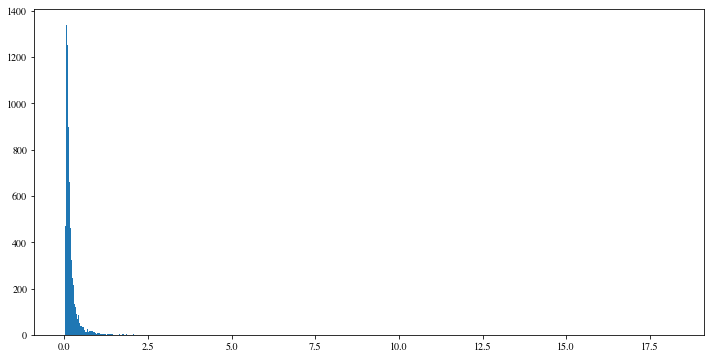

In [30]:
plt.figure(figsize = (12, 6))
plt.hist(np.square(test_xs - test_x_preds).mean(axis=1), bins='fd')
# distribution close to 0? some points it really doesn't do well on but seems to do a decent job for the most part

Reconstruction loss can be done by bolting both NNs to each other:

Try only training using reconstruction loss (without KL divergence) first:

In [93]:
def encoder():
    """
    encoder part of the autoencoder
    incorporates both kl structure penalty and reconstruction loss
    
    """
    # functional rather than sequential interface
    
    # input
    inputs = tf.keras.Input(shape=(20, ), name='input_layer')
    
    # first layer
    l1 = tf.keras.layers.Dense(units=100, activation='gelu')(inputs)
    
    # second layer
    l2 = tf.keras.layers.Dense(units=100, activation='gelu')(l1)
    
    # third layer
    l3 = tf.keras.layers.Dense(units=50, activation='gelu')(l2)
    
    # fourth layer
    l4 = tf.keras.layers.Dense(units=25, activation='gelu')(l3)
    
    # fifth layer
    l5 = tf.keras.layers.Dense(units=10, activation='gelu')(l4)
    
    # sixth layer
    l6 = tf.keras.layers.Dense(units=4, activation='gelu')(l5)
    
    # Final Block
    # flatten = tf.keras.layers.Flatten()(l6)
    # mean = tf.keras.layers.Dense(units=2, name='mean')(flatten)
    # log_var = tf.keras.layers.Dense(units=2, name='log_var')(flatten)
    latent = tf.keras.layers.Dense(units=4)(l6)
    
    model = tf.keras.Model(inputs, latent, name='Encoder')
    # model = tf.keras.Model(inputs, (mean, log_var), name='Encoder')

    return model

    
def decoder(input_decoder):
    """
    decoder part of the autoencoder
    incorporates both kl structure penalty and reconstruction loss?
    
    """
    # functional rather than sequential interface
    
    # input
    inputs = tf.keras.Input(shape=input_decoder, name='input_layer')
    
    # flatten before starting
    l0 = tf.keras.layers.Flatten()(inputs)
    
    # first layer
    l1 = tf.keras.layers.Dense(units=10, activation='gelu')(inputs)
    
    # second layer
    l2 = tf.keras.layers.Dense(units=25, activation='gelu')(l1)
    
    # third layer
    l3 = tf.keras.layers.Dense(units=50, activation='gelu')(l2)
    
    # fourth layer
    l4 = tf.keras.layers.Dense(units=100, activation='gelu')(l3)
    
    # fifth layer
    l5 = tf.keras.layers.Dense(units=100, activation='gelu')(l4)
    
    # sixth layer
    l6 = tf.keras.layers.Dense(units=50, activation='gelu')(l5)

    # final block
    outputs = tf.keras.layers.Dense(units=20)(l6)
    model = tf.keras.Model(inputs, outputs, name='Decoder')
    
    return model
    
    

Encoder takes 20-D data, decoder takes 4-D

In [94]:
enc = encoder()
dec = decoder((2, 2))

In [95]:
alpha = 0.0005
optimizer = tf.keras.optimizers.Adam(learning_rate = alpha)


def mse_loss(y_true, y_pred):
    r_loss = tf.keras.mean(tf.keras.square(y_true - y_pred))
    return 1000 * r_loss

@tf.function
def train_step(xs):
    with tf.GradientTape() as encoder, tf.GradientTape() as decoder:
        # encoder
        latent = enc(xs, training=True)
        # decoder
        print(latent)
        pred_xs = dec(latent, training=True)
        loss = mse_loss(xs, pred_xs)
    
    # gradients/optimization
    gradients_of_enc = encoder.gradient(loss, enc.trainable_variables)
    gradients_of_dec = decoder.gradient(loss, dec.trainable_variables)
    optimizer.apply_gradients(zip(gradients_of_enc, enc.trainable_variables))
    optimizer.apply_gradients(zip(gradients_of_dec, dec.trainable_variables))
    
    return loss

def train(dataset):
    for xs in dataset:
        train_step(xs)

In [96]:
train_xs[0].shape

(20,)

In [97]:
enc(train_xs[0])

ValueError: Exception encountered when calling layer "Encoder" (type Functional).

Input 0 of layer "dense_102" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (20,)

Call arguments received:
  • inputs=tf.Tensor(shape=(20,), dtype=float64)
  • training=None
  • mask=None

In [68]:
train_step(train_xs[0])

ValueError: in user code:

    File "<ipython-input-59-7484c8d378ef>", line 13, in train_step  *
        latent = enc(xs, training=True)
    File "/home/ian-chow/.local/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler  **
        raise e.with_traceback(filtered_tb) from None
    File "/home/ian-chow/.local/lib/python3.8/site-packages/keras/engine/input_spec.py", line 228, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "Encoder" (type Functional).
    
    Input 0 of layer "dense_48" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (20,)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(20,), dtype=float64)
      • training=True
      • mask=None


In [66]:
train(train_xs)

ValueError: in user code:

    File "<ipython-input-59-7484c8d378ef>", line 13, in train_step  *
        latent = enc(xs, training=True)
    File "/home/ian-chow/.local/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler  **
        raise e.with_traceback(filtered_tb) from None
    File "/home/ian-chow/.local/lib/python3.8/site-packages/keras/engine/input_spec.py", line 228, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "Encoder" (type Functional).
    
    Input 0 of layer "dense_48" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (20,)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(20,), dtype=float64)
      • training=True
      • mask=None


## TUTORIAL:

In [31]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Display images

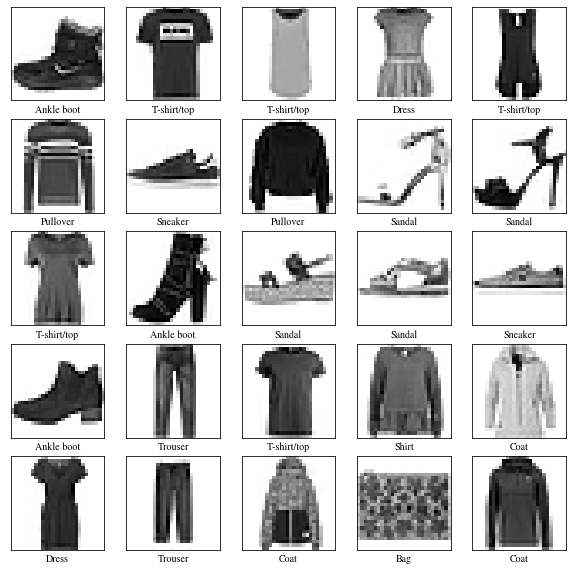

In [32]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Preprocessing:

In [33]:
def preprocess(x, y):
    x = tf.cast(x, tf.float32) / 255.0  # use the range 0 to 1 for the data
    y = tf.cast(y, tf.int64)  # cast this to int64
    
    return x, y

def create_dataset(xs_data, ys_data, num_classes=10):
    ys_data = tf.one_hot(ys_data, depth=num_classes)
    
    return tf.data.Dataset.from_tensor_slices((xs_data, ys_data)).map(preprocess)

Create dataset:

In [34]:
train_dataset = create_dataset(train_images, train_labels)
val_dataset = create_dataset(test_images, test_labels)

Create model:

In [35]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=192, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10)
])

In [36]:
train_dataset

<MapDataset element_spec=(TensorSpec(shape=(28, 28), dtype=tf.float32, name=None), TensorSpec(shape=(10,), dtype=tf.int64, name=None))>

Train model

In [37]:
model.compile(optimizer='adam', 
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

# history = model.fit(
#     train_dataset.repeat(), 
#     epochs=10, 
#     steps_per_epoch=500,
#     validation_data=val_dataset.repeat(), 
#     validation_steps=2
# )

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.3798 - accuracy: 0.7712
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4757 - accuracy: 0.8328
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4238 - accuracy: 0.8475
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4002 - accuracy: 0.8542
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3821 - accuracy: 0.8615
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3708 - accuracy: 0.8674
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3532 - accuracy: 0.8728
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3513 - accuracy: 0.8746
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3410 - accuracy: 0.8778
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.323

Evaluate accuracy:

In [38]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3830 - accuracy: 0.8660 - 677ms/epoch - 2ms/step

Test accuracy: 0.8659999966621399


See the predictions:

In [39]:
predictions = tf.keras.Sequential([model, tf.keras.layers.Softmax()]).predict(test_images)
predictions

array([[1.7767064e-09, 2.8334109e-14, 1.0742064e-12, ..., 3.3191752e-02,
        6.4028045e-09, 9.5135510e-01],
       [8.4344683e-06, 9.6307007e-10, 9.9824655e-01, ..., 7.5624995e-28,
        4.6810630e-08, 1.5529977e-19],
       [1.7843169e-17, 1.0000000e+00, 3.2822834e-19, ..., 0.0000000e+00,
        8.6067468e-29, 0.0000000e+00],
       ...,
       [3.8736940e-03, 3.7942837e-06, 4.2802994e-03, ..., 4.4646415e-11,
        5.4329336e-01, 8.8571919e-12],
       [4.8832609e-12, 1.0000000e+00, 1.1074477e-12, ..., 2.8165566e-37,
        1.4899099e-12, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 4.6008393e-20,
        6.1327477e-18, 3.7940454e-27]], dtype=float32)

accuracy:

In [40]:
np.array([np.argmax(prediction) for prediction in predictions]), test_labels

(array([9, 2, 1, ..., 8, 1, 5]), array([9, 2, 1, ..., 8, 1, 5], dtype=uint8))

In [41]:
np.mean(np.array([np.argmax(prediction) for prediction in predictions]) == test_labels)

0.866